In [2]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.5 MB 7.4 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.5 MB 6.8 MB/s eta 0:00:02
   ---------------- ----------------------- 4.7/11.5 MB 6.6 MB/s eta 0:00:02
   ------------------------ --------------- 7.1/11.5 MB 6.7 MB/s eta 0:00:01
   ------------------------------- -------- 8.9/11.5 MB 6.8 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.5 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)
time_intervals = 1000  # Number of time intervals to simulate
directions = ['North', 'East', 'South', 'West']

# Simulate vehicle counts in each direction over time
traffic_data = {
    'Time': np.arange(time_intervals),
    'North': np.random.poisson(lam=10, size=time_intervals),
    'East': np.random.poisson(lam=15, size=time_intervals),
    'South': np.random.poisson(lam=20, size=time_intervals),
    'West': np.random.poisson(lam=5, size=time_intervals),
}

# Create a DataFrame
df = pd.DataFrame(traffic_data)

# Display the first few rows
df.head()


,Time,North,East,South,West
0,0,12,18,16,4
1,1,6,10,17,9
2,2,11,18,15,2
3,3,14,10,19,4
4,4,7,18,21,3


In [4]:
# Define congestion threshold (e.g., 25 vehicles)
congestion_threshold = 25

# Detect congestion
df['Congestion_North'] = df['North'] > congestion_threshold
df['Congestion_East'] = df['East'] > congestion_threshold
df['Congestion_South'] = df['South'] > congestion_threshold
df['Congestion_West'] = df['West'] > congestion_threshold

# Count congestion occurrences
congestion_counts = df[['Congestion_North', 'Congestion_East', 'Congestion_South', 'Congestion_West']].sum()
print(congestion_counts)


Congestion_North      0
Congestion_East       8
Congestion_South    111
Congestion_West       0
dtype: int64


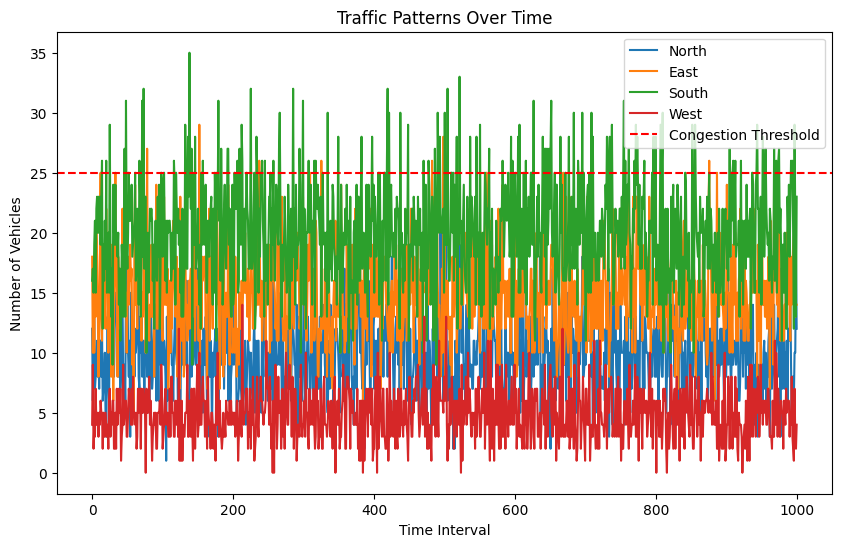

Number of peak traffic intervals: 80


In [5]:
# Traffic patterns over time
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['North'], label='North')
plt.plot(df['Time'], df['East'], label='East')
plt.plot(df['Time'], df['South'], label='South')
plt.plot(df['Time'], df['West'], label='West')
plt.axhline(y=congestion_threshold, color='r', linestyle='--', label='Congestion Threshold')
plt.title('Traffic Patterns Over Time')
plt.xlabel('Time Interval')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

# Identify peak traffic times (when the total traffic exceeds a certain threshold)
df['Total_Traffic'] = df[['North', 'East', 'South', 'West']].sum(axis=1)
peak_traffic_threshold = 60
peak_times = df[df['Total_Traffic'] > peak_traffic_threshold]

print(f"Number of peak traffic intervals: {len(peak_times)}")


In [6]:
# Example of dynamic signal timing strategy
def dynamic_signal_timing(direction, vehicle_count):
    if vehicle_count > congestion_threshold:
        return "Extend Green Light Duration"
    elif vehicle_count > (congestion_threshold / 2):
        return "Maintain Current Timing"
    else:
        return "Reduce Green Light Duration"

# Apply strategy to each direction
df['Signal_North'] = df['North'].apply(lambda x: dynamic_signal_timing('North', x))
df['Signal_East'] = df['East'].apply(lambda x: dynamic_signal_timing('East', x))
df['Signal_South'] = df['South'].apply(lambda x: dynamic_signal_timing('South', x))
df['Signal_West'] = df['West'].apply(lambda x: dynamic_signal_timing('West', x))

# Show recommendations for the first few intervals
df[['Time', 'North', 'Signal_North', 'East', 'Signal_East', 'South', 'Signal_South', 'West', 'Signal_West']].head()


,Time,North,Signal_North,East,Signal_East,South,Signal_South,West,Signal_West
0,0,12,Reduce Green Light Duration,18,Maintain Current Timing,16,Maintain Current Timing,4,Reduce Green Light Duration
1,1,6,Reduce Green Light Duration,10,Reduce Green Light Duration,17,Maintain Current Timing,9,Reduce Green Light Duration
2,2,11,Reduce Green Light Duration,18,Maintain Current Timing,15,Maintain Current Timing,2,Reduce Green Light Duration
3,3,14,Maintain Current Timing,10,Reduce Green Light Duration,19,Maintain Current Timing,4,Reduce Green Light Duration
4,4,7,Reduce Green Light Duration,18,Maintain Current Timing,21,Maintain Current Timing,3,Reduce Green Light Duration


In [7]:
# Example Summary Report
def generate_summary_report():
    report = """
    Smart City Traffic Management Report
    
    Traffic Analysis:
    - Peak traffic times: {} intervals
    - Congestion hotspots identified in the following directions:
      North: {} times, East: {} times, South: {} times, West: {} times
    
    Recommended Strategies:
    - Dynamic Signal Timing: Adjust signal timing based on real-time traffic data.
    - Prioritize Congested Directions: Increase green light duration for congested directions.
    - Deploy Smart Traffic Lights: Implement adaptive traffic lights that respond to traffic conditions.
    - Implement Traffic Diversion: Suggest alternative routes to reduce congestion.
    
    Conclusion:
    The proposed strategies are expected to improve traffic flow, reduce congestion, and enhance overall traffic management in the city.
    """.format(
        len(peak_times),
        congestion_counts['Congestion_North'],
        congestion_counts['Congestion_East'],
        congestion_counts['Congestion_South'],
        congestion_counts['Congestion_West']
    )
    print(report)

generate_summary_report()



    Smart City Traffic Management Report
    
    Traffic Analysis:
    - Peak traffic times: 80 intervals
    - Congestion hotspots identified in the following directions:
      North: 0 times, East: 8 times, South: 111 times, West: 0 times
    
    Recommended Strategies:
    - Dynamic Signal Timing: Adjust signal timing based on real-time traffic data.
    - Prioritize Congested Directions: Increase green light duration for congested directions.
    - Deploy Smart Traffic Lights: Implement adaptive traffic lights that respond to traffic conditions.
    - Implement Traffic Diversion: Suggest alternative routes to reduce congestion.
    
    Conclusion:
    The proposed strategies are expected to improve traffic flow, reduce congestion, and enhance overall traffic management in the city.
    
